In [1]:
from Parareal_library import *

In [2]:
Square_limit_cycle = EDO_Square_limit_cycle (0.2, 0, [0.01,0.02])
Example_linear = EDO_Example_linear(1,0,[0.2])
Example_non_linear = EDO_Example_non_linear(1,0,[2])
CosSin = EDO_CosSin(1,1,0,[0,1])
Lorentz_system = EDO_Lorentz_system(28,10,8/3, 0, [0.3,0.2,0.2])
edo = Square_limit_cycle

## Test Solvers

## Test DeepONet

In [53]:
n, m = 1000, 200 # n: nb d'éléments du dataset, m: nb de points pour appeller la fonction
T, X,Y = create_dataset(edo, Odeint_method, n, m, init_interval = [0,1.3],time_init_interval = [0,10], time_delta_interval=[0.2,1])

batch_size = 50
train_dataset = TrainDataset(T,X,Y)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=1)

2
y0: [ 0.21863822 -0.29730792] t0: 8.429011108156239 h:  [0.03374688 0.99943041] T: 0.7671161771217105 delta_t:  0.0007671161771217105
y0: [0.50930267 0.83010296] t0: 5.143843307231028 h:  [-0.98627881 -0.16508819] T: 0.7404899014795208 delta_t:  0.0007404899014795208
y0: [-0.45166993 -0.25467394] t0: 0.5123849923679624 h:  [0.50912589 0.86069206] T: 0.271274057697269 delta_t:  0.00027127405769726895
y0: [0.39995778 0.08232314] t0: 3.5180291565118784 h:  [ 0.42027029 -0.90739896] T: 0.6872454556608445 delta_t:  0.0006872454556608445
y0: [0.24907937 0.75036289] t0: 5.9185643617718 h:  [0.99367753 0.11227184] T: 0.7524314813562738 delta_t:  0.0007524314813562738
y0: [-0.40097939  0.34673636] t0: 0.5185790748199659 h:  [0.99985026 0.01730456] T: 0.6876686369632607 delta_t:  0.0006876686369632608
y0: [-0.01059454  1.08789724] t0: 9.321590107193217 h:  [-0.08509237  0.99637307] T: 0.8034493917960197 delta_t:  0.0008034493917960197
y0: [0.25604078 0.59935562] t0: 7.7202133984708246 h:  [-0.

In [54]:
print(Onet)
num_epochs = 300
optimizer = torch.optim.Adam(Onet.parameters(), lr=0.001)

Loss = Loss_parametrized(lbd = 1)
loss_history = train_neural_network(Onet, num_epochs, Loss, train_loader, optimizer)
print(loss_history[-1])

DeepONet(
  (branch): MLP(
    (linear_in): Linear(in_features=3, out_features=40, bias=True)
    (linear_out): Linear(in_features=40, out_features=50, bias=True)
    (activation): GELU(approximate='none')
    (layers): ModuleList(
      (0): Linear(in_features=3, out_features=40, bias=True)
      (1-5): 5 x Linear(in_features=40, out_features=40, bias=True)
    )
  )
  (trunk): MLP(
    (linear_in): Linear(in_features=1, out_features=40, bias=True)
    (linear_out): Linear(in_features=40, out_features=50, bias=True)
    (activation): GELU(approximate='none')
    (layers): ModuleList(
      (0): Linear(in_features=1, out_features=40, bias=True)
      (1-5): 5 x Linear(in_features=40, out_features=40, bias=True)
    )
  )
  (fc): Linear(in_features=50, out_features=2, bias=False)
)


Epoch 1: 100%|███████████████████████| 4/4 [00:01<00:00,  3.49it/s, loss=0.6569]


Epoch 1, Average Loss: 0.9153


Epoch 2: 100%|███████████████████████| 4/4 [00:01<00:00,  3.55it/s, loss=0.4749]


Epoch 2, Average Loss: 0.5508


Epoch 3: 100%|███████████████████████| 4/4 [00:01<00:00,  3.48it/s, loss=0.3773]


Epoch 3, Average Loss: 0.3697


Epoch 4: 100%|███████████████████████| 4/4 [00:01<00:00,  3.63it/s, loss=0.2664]


Epoch 4, Average Loss: 0.2503


Epoch 5: 100%|███████████████████████| 4/4 [00:01<00:00,  3.78it/s, loss=0.2131]


Epoch 5, Average Loss: 0.2313


Epoch 6: 100%|███████████████████████| 4/4 [00:01<00:00,  3.72it/s, loss=0.1687]


Epoch 6, Average Loss: 0.1935


Epoch 7: 100%|███████████████████████| 4/4 [00:01<00:00,  3.81it/s, loss=0.1595]


Epoch 7, Average Loss: 0.1549


Epoch 8: 100%|███████████████████████| 4/4 [00:01<00:00,  3.82it/s, loss=0.1440]


Epoch 8, Average Loss: 0.1484


Epoch 9: 100%|███████████████████████| 4/4 [00:01<00:00,  3.59it/s, loss=0.1300]


Epoch 9, Average Loss: 0.1302


Epoch 10: 100%|██████████████████████| 4/4 [00:01<00:00,  3.88it/s, loss=0.1266]


Epoch 10, Average Loss: 0.1215


Epoch 11: 100%|██████████████████████| 4/4 [00:01<00:00,  3.62it/s, loss=0.1069]


Epoch 11, Average Loss: 0.1134


Epoch 12: 100%|██████████████████████| 4/4 [00:01<00:00,  3.81it/s, loss=0.1186]


Epoch 12, Average Loss: 0.1102


Epoch 13: 100%|██████████████████████| 4/4 [00:01<00:00,  3.80it/s, loss=0.1212]


Epoch 13, Average Loss: 0.1119


Epoch 14: 100%|██████████████████████| 4/4 [00:01<00:00,  3.88it/s, loss=0.1264]


Epoch 14, Average Loss: 0.1065


Epoch 15: 100%|██████████████████████| 4/4 [00:01<00:00,  3.75it/s, loss=0.1037]


Epoch 15, Average Loss: 0.1005


Epoch 16: 100%|██████████████████████| 4/4 [00:01<00:00,  3.78it/s, loss=0.0881]


Epoch 16, Average Loss: 0.0983


Epoch 17: 100%|██████████████████████| 4/4 [00:01<00:00,  3.67it/s, loss=0.1021]


Epoch 17, Average Loss: 0.0988


Epoch 18: 100%|██████████████████████| 4/4 [00:01<00:00,  3.73it/s, loss=0.1170]


Epoch 18, Average Loss: 0.0966


Epoch 19: 100%|██████████████████████| 4/4 [00:01<00:00,  3.52it/s, loss=0.0978]


Epoch 19, Average Loss: 0.0975


Epoch 20: 100%|██████████████████████| 4/4 [00:01<00:00,  3.15it/s, loss=0.0880]


Epoch 20, Average Loss: 0.0933


Epoch 21: 100%|██████████████████████| 4/4 [00:01<00:00,  3.26it/s, loss=0.0921]


Epoch 21, Average Loss: 0.0931


Epoch 22: 100%|██████████████████████| 4/4 [00:01<00:00,  3.08it/s, loss=0.0905]


Epoch 22, Average Loss: 0.0928


Epoch 23: 100%|██████████████████████| 4/4 [00:01<00:00,  3.01it/s, loss=0.0893]


Epoch 23, Average Loss: 0.0963


Epoch 24: 100%|██████████████████████| 4/4 [00:01<00:00,  3.03it/s, loss=0.1165]


Epoch 24, Average Loss: 0.0994


Epoch 25: 100%|██████████████████████| 4/4 [00:01<00:00,  2.91it/s, loss=0.0915]


Epoch 25, Average Loss: 0.0928


Epoch 26: 100%|██████████████████████| 4/4 [00:01<00:00,  2.93it/s, loss=0.0993]


Epoch 26, Average Loss: 0.0959


Epoch 27: 100%|██████████████████████| 4/4 [00:01<00:00,  3.10it/s, loss=0.0881]


Epoch 27, Average Loss: 0.0941


Epoch 28: 100%|██████████████████████| 4/4 [00:01<00:00,  3.07it/s, loss=0.0933]


Epoch 28, Average Loss: 0.0967


Epoch 29: 100%|██████████████████████| 4/4 [00:01<00:00,  3.11it/s, loss=0.1125]


Epoch 29, Average Loss: 0.1067


Epoch 30: 100%|██████████████████████| 4/4 [00:01<00:00,  3.10it/s, loss=0.1019]


Epoch 30, Average Loss: 0.1021


Epoch 31: 100%|██████████████████████| 4/4 [00:01<00:00,  3.22it/s, loss=0.0890]


Epoch 31, Average Loss: 0.0904


Epoch 32: 100%|██████████████████████| 4/4 [00:01<00:00,  3.15it/s, loss=0.1063]


Epoch 32, Average Loss: 0.0954


Epoch 33: 100%|██████████████████████| 4/4 [00:01<00:00,  2.95it/s, loss=0.0753]


Epoch 33, Average Loss: 0.0883


Epoch 34: 100%|██████████████████████| 4/4 [00:01<00:00,  3.10it/s, loss=0.0842]


Epoch 34, Average Loss: 0.0843


Epoch 35: 100%|██████████████████████| 4/4 [00:01<00:00,  3.26it/s, loss=0.0835]


Epoch 35, Average Loss: 0.0890


Epoch 36: 100%|██████████████████████| 4/4 [00:01<00:00,  3.13it/s, loss=0.0886]


Epoch 36, Average Loss: 0.0851


Epoch 37: 100%|██████████████████████| 4/4 [00:01<00:00,  3.17it/s, loss=0.0879]


Epoch 37, Average Loss: 0.0879


Epoch 38: 100%|██████████████████████| 4/4 [00:01<00:00,  3.08it/s, loss=0.0862]


Epoch 38, Average Loss: 0.0845


Epoch 39: 100%|██████████████████████| 4/4 [00:01<00:00,  3.08it/s, loss=0.0799]


Epoch 39, Average Loss: 0.0832


Epoch 40: 100%|██████████████████████| 4/4 [00:01<00:00,  3.18it/s, loss=0.0815]


Epoch 40, Average Loss: 0.0840


Epoch 41: 100%|██████████████████████| 4/4 [00:01<00:00,  3.19it/s, loss=0.0889]


Epoch 41, Average Loss: 0.0892


Epoch 42: 100%|██████████████████████| 4/4 [00:01<00:00,  3.25it/s, loss=0.0908]


Epoch 42, Average Loss: 0.0813


Epoch 43: 100%|██████████████████████| 4/4 [00:01<00:00,  3.16it/s, loss=0.0794]


Epoch 43, Average Loss: 0.0849


Epoch 44: 100%|██████████████████████| 4/4 [00:01<00:00,  3.12it/s, loss=0.0907]


Epoch 44, Average Loss: 0.0857


Epoch 45: 100%|██████████████████████| 4/4 [00:01<00:00,  3.04it/s, loss=0.0828]


Epoch 45, Average Loss: 0.0855


Epoch 46: 100%|██████████████████████| 4/4 [00:01<00:00,  3.23it/s, loss=0.0769]


Epoch 46, Average Loss: 0.0785


Epoch 47: 100%|██████████████████████| 4/4 [00:01<00:00,  3.23it/s, loss=0.0835]


Epoch 47, Average Loss: 0.0765


Epoch 48: 100%|██████████████████████| 4/4 [00:01<00:00,  3.19it/s, loss=0.0773]


Epoch 48, Average Loss: 0.0767


Epoch 49: 100%|██████████████████████| 4/4 [00:01<00:00,  3.17it/s, loss=0.0768]


Epoch 49, Average Loss: 0.0790


Epoch 50: 100%|██████████████████████| 4/4 [00:01<00:00,  3.20it/s, loss=0.0855]


Epoch 50, Average Loss: 0.0794


Epoch 51: 100%|██████████████████████| 4/4 [00:01<00:00,  3.18it/s, loss=0.0827]


Epoch 51, Average Loss: 0.0764


Epoch 52: 100%|██████████████████████| 4/4 [00:01<00:00,  3.16it/s, loss=0.0687]


Epoch 52, Average Loss: 0.0735


Epoch 53: 100%|██████████████████████| 4/4 [00:01<00:00,  3.08it/s, loss=0.0748]


Epoch 53, Average Loss: 0.0739


Epoch 54: 100%|██████████████████████| 4/4 [00:01<00:00,  3.19it/s, loss=0.0756]


Epoch 54, Average Loss: 0.0717


Epoch 55: 100%|██████████████████████| 4/4 [00:01<00:00,  3.06it/s, loss=0.0713]


Epoch 55, Average Loss: 0.0716


Epoch 56: 100%|██████████████████████| 4/4 [00:01<00:00,  3.19it/s, loss=0.0716]


Epoch 56, Average Loss: 0.0739


Epoch 57: 100%|██████████████████████| 4/4 [00:01<00:00,  3.11it/s, loss=0.0803]


Epoch 57, Average Loss: 0.0762


Epoch 58: 100%|██████████████████████| 4/4 [00:01<00:00,  2.96it/s, loss=0.0847]


Epoch 58, Average Loss: 0.0749


Epoch 59: 100%|██████████████████████| 4/4 [00:01<00:00,  3.07it/s, loss=0.0753]


Epoch 59, Average Loss: 0.0818


Epoch 60: 100%|██████████████████████| 4/4 [00:01<00:00,  3.07it/s, loss=0.0717]


Epoch 60, Average Loss: 0.0853


Epoch 61: 100%|██████████████████████| 4/4 [00:01<00:00,  3.21it/s, loss=0.0744]


Epoch 61, Average Loss: 0.0805


Epoch 62: 100%|██████████████████████| 4/4 [00:01<00:00,  3.16it/s, loss=0.0745]


Epoch 62, Average Loss: 0.0714


Epoch 63: 100%|██████████████████████| 4/4 [00:01<00:00,  3.13it/s, loss=0.0767]


Epoch 63, Average Loss: 0.0740


Epoch 64: 100%|██████████████████████| 4/4 [00:01<00:00,  3.04it/s, loss=0.0697]


Epoch 64, Average Loss: 0.0721


Epoch 65: 100%|██████████████████████| 4/4 [00:01<00:00,  3.05it/s, loss=0.0777]


Epoch 65, Average Loss: 0.0780


Epoch 66: 100%|██████████████████████| 4/4 [00:01<00:00,  2.99it/s, loss=0.0954]


Epoch 66, Average Loss: 0.0780


Epoch 67: 100%|██████████████████████| 4/4 [00:01<00:00,  3.12it/s, loss=0.0808]


Epoch 67, Average Loss: 0.0729


Epoch 68: 100%|██████████████████████| 4/4 [00:01<00:00,  3.18it/s, loss=0.0859]


Epoch 68, Average Loss: 0.0745


Epoch 69: 100%|██████████████████████| 4/4 [00:01<00:00,  3.27it/s, loss=0.0735]


Epoch 69, Average Loss: 0.0799


Epoch 70: 100%|██████████████████████| 4/4 [00:01<00:00,  3.12it/s, loss=0.0875]


Epoch 70, Average Loss: 0.0831


Epoch 71: 100%|██████████████████████| 4/4 [00:01<00:00,  2.74it/s, loss=0.0723]


Epoch 71, Average Loss: 0.0816


Epoch 72: 100%|██████████████████████| 4/4 [00:01<00:00,  2.95it/s, loss=0.0715]


Epoch 72, Average Loss: 0.0698


Epoch 73: 100%|██████████████████████| 4/4 [00:01<00:00,  3.04it/s, loss=0.0668]


Epoch 73, Average Loss: 0.0760


Epoch 74: 100%|██████████████████████| 4/4 [00:01<00:00,  3.13it/s, loss=0.0688]


Epoch 74, Average Loss: 0.0796


Epoch 75: 100%|██████████████████████| 4/4 [00:01<00:00,  2.81it/s, loss=0.0840]


Epoch 75, Average Loss: 0.0770


Epoch 76: 100%|██████████████████████| 4/4 [00:01<00:00,  3.16it/s, loss=0.0843]


Epoch 76, Average Loss: 0.0737


Epoch 77: 100%|██████████████████████| 4/4 [00:01<00:00,  3.17it/s, loss=0.0662]


Epoch 77, Average Loss: 0.0680


Epoch 78: 100%|██████████████████████| 4/4 [00:01<00:00,  3.17it/s, loss=0.0700]


Epoch 78, Average Loss: 0.0665


Epoch 79: 100%|██████████████████████| 4/4 [00:01<00:00,  3.23it/s, loss=0.0748]


Epoch 79, Average Loss: 0.0736


Epoch 80: 100%|██████████████████████| 4/4 [00:01<00:00,  3.16it/s, loss=0.0697]


Epoch 80, Average Loss: 0.0724


Epoch 81: 100%|██████████████████████| 4/4 [00:01<00:00,  3.03it/s, loss=0.0655]


Epoch 81, Average Loss: 0.0640


Epoch 82: 100%|██████████████████████| 4/4 [00:01<00:00,  3.03it/s, loss=0.0607]


Epoch 82, Average Loss: 0.0624


Epoch 83: 100%|██████████████████████| 4/4 [00:01<00:00,  3.11it/s, loss=0.0680]


Epoch 83, Average Loss: 0.0654


Epoch 84: 100%|██████████████████████| 4/4 [00:01<00:00,  3.14it/s, loss=0.0548]


Epoch 84, Average Loss: 0.0601


Epoch 85: 100%|██████████████████████| 4/4 [00:01<00:00,  3.12it/s, loss=0.0723]


Epoch 85, Average Loss: 0.0692


Epoch 86: 100%|██████████████████████| 4/4 [00:01<00:00,  3.12it/s, loss=0.0706]


Epoch 86, Average Loss: 0.0671


Epoch 87: 100%|██████████████████████| 4/4 [00:01<00:00,  3.19it/s, loss=0.0687]


Epoch 87, Average Loss: 0.0648


Epoch 88: 100%|██████████████████████| 4/4 [00:01<00:00,  3.10it/s, loss=0.0622]


Epoch 88, Average Loss: 0.0648


Epoch 89: 100%|██████████████████████| 4/4 [00:01<00:00,  3.18it/s, loss=0.0581]


Epoch 89, Average Loss: 0.0624


Epoch 90: 100%|██████████████████████| 4/4 [00:01<00:00,  3.16it/s, loss=0.0624]


Epoch 90, Average Loss: 0.0606


Epoch 91: 100%|██████████████████████| 4/4 [00:01<00:00,  3.11it/s, loss=0.0644]


Epoch 91, Average Loss: 0.0680


Epoch 92: 100%|██████████████████████| 4/4 [00:01<00:00,  3.15it/s, loss=0.0849]


Epoch 92, Average Loss: 0.0721


Epoch 93: 100%|██████████████████████| 4/4 [00:01<00:00,  3.05it/s, loss=0.0673]


Epoch 93, Average Loss: 0.0875


Epoch 94: 100%|██████████████████████| 4/4 [00:01<00:00,  3.09it/s, loss=0.0805]


Epoch 94, Average Loss: 0.0794


Epoch 95: 100%|██████████████████████| 4/4 [00:01<00:00,  3.18it/s, loss=0.0920]


Epoch 95, Average Loss: 0.1038


Epoch 96: 100%|██████████████████████| 4/4 [00:01<00:00,  3.11it/s, loss=0.1310]


Epoch 96, Average Loss: 0.1146


Epoch 97: 100%|██████████████████████| 4/4 [00:01<00:00,  3.14it/s, loss=0.0790]


Epoch 97, Average Loss: 0.1078


Epoch 98: 100%|██████████████████████| 4/4 [00:01<00:00,  3.19it/s, loss=0.1200]


Epoch 98, Average Loss: 0.1023


Epoch 99: 100%|██████████████████████| 4/4 [00:01<00:00,  3.06it/s, loss=0.0572]


Epoch 99, Average Loss: 0.0759


Epoch 100: 100%|█████████████████████| 4/4 [00:01<00:00,  3.19it/s, loss=0.0738]


Epoch 100, Average Loss: 0.0704


Epoch 101: 100%|█████████████████████| 4/4 [00:01<00:00,  2.88it/s, loss=0.0683]


Epoch 101, Average Loss: 0.0661


Epoch 102: 100%|█████████████████████| 4/4 [00:01<00:00,  3.02it/s, loss=0.0601]


Epoch 102, Average Loss: 0.0638


Epoch 103: 100%|█████████████████████| 4/4 [00:01<00:00,  2.96it/s, loss=0.0653]


Epoch 103, Average Loss: 0.0674


Epoch 104: 100%|█████████████████████| 4/4 [00:01<00:00,  3.12it/s, loss=0.0817]


Epoch 104, Average Loss: 0.0781


Epoch 105: 100%|█████████████████████| 4/4 [00:01<00:00,  3.20it/s, loss=0.0831]


Epoch 105, Average Loss: 0.0741


Epoch 106: 100%|█████████████████████| 4/4 [00:01<00:00,  3.19it/s, loss=0.0742]


Epoch 106, Average Loss: 0.0749


Epoch 107: 100%|█████████████████████| 4/4 [00:01<00:00,  3.04it/s, loss=0.0574]


Epoch 107, Average Loss: 0.0662


Epoch 108: 100%|█████████████████████| 4/4 [00:01<00:00,  3.24it/s, loss=0.0726]


Epoch 108, Average Loss: 0.0647


Epoch 109: 100%|█████████████████████| 4/4 [00:01<00:00,  3.14it/s, loss=0.0679]


Epoch 109, Average Loss: 0.0656


Epoch 110: 100%|█████████████████████| 4/4 [00:01<00:00,  3.24it/s, loss=0.0701]


Epoch 110, Average Loss: 0.0628


Epoch 111: 100%|█████████████████████| 4/4 [00:01<00:00,  3.21it/s, loss=0.0657]


Epoch 111, Average Loss: 0.0639


Epoch 112: 100%|█████████████████████| 4/4 [00:01<00:00,  3.19it/s, loss=0.0592]


Epoch 112, Average Loss: 0.0620


Epoch 113: 100%|█████████████████████| 4/4 [00:01<00:00,  3.20it/s, loss=0.0598]


Epoch 113, Average Loss: 0.0635


Epoch 114: 100%|█████████████████████| 4/4 [00:01<00:00,  3.09it/s, loss=0.0621]


Epoch 114, Average Loss: 0.0648


Epoch 115: 100%|█████████████████████| 4/4 [00:01<00:00,  3.16it/s, loss=0.0665]


Epoch 115, Average Loss: 0.0603


Epoch 116: 100%|█████████████████████| 4/4 [00:01<00:00,  3.14it/s, loss=0.0595]


Epoch 116, Average Loss: 0.0623


Epoch 117: 100%|█████████████████████| 4/4 [00:01<00:00,  3.13it/s, loss=0.0659]


Epoch 117, Average Loss: 0.0603


Epoch 118: 100%|█████████████████████| 4/4 [00:01<00:00,  2.88it/s, loss=0.0634]


Epoch 118, Average Loss: 0.0601


Epoch 119: 100%|█████████████████████| 4/4 [00:01<00:00,  2.99it/s, loss=0.0667]


Epoch 119, Average Loss: 0.0637


Epoch 120: 100%|█████████████████████| 4/4 [00:01<00:00,  3.14it/s, loss=0.0473]


Epoch 120, Average Loss: 0.0621


Epoch 121: 100%|█████████████████████| 4/4 [00:01<00:00,  3.11it/s, loss=0.0617]


Epoch 121, Average Loss: 0.0593


Epoch 122: 100%|█████████████████████| 4/4 [00:01<00:00,  3.10it/s, loss=0.0633]


Epoch 122, Average Loss: 0.0604


Epoch 123: 100%|█████████████████████| 4/4 [00:01<00:00,  3.13it/s, loss=0.0622]


Epoch 123, Average Loss: 0.0629


Epoch 124: 100%|█████████████████████| 4/4 [00:01<00:00,  3.19it/s, loss=0.0642]


Epoch 124, Average Loss: 0.0615


Epoch 125: 100%|█████████████████████| 4/4 [00:01<00:00,  3.20it/s, loss=0.0538]


Epoch 125, Average Loss: 0.0638


Epoch 126: 100%|█████████████████████| 4/4 [00:01<00:00,  3.17it/s, loss=0.0491]


Epoch 126, Average Loss: 0.0554


Epoch 127: 100%|█████████████████████| 4/4 [00:01<00:00,  3.17it/s, loss=0.0561]


Epoch 127, Average Loss: 0.0597


Epoch 128: 100%|█████████████████████| 4/4 [00:01<00:00,  3.08it/s, loss=0.0516]


Epoch 128, Average Loss: 0.0542


Epoch 129: 100%|█████████████████████| 4/4 [00:01<00:00,  3.18it/s, loss=0.0513]


Epoch 129, Average Loss: 0.0539


Epoch 130: 100%|█████████████████████| 4/4 [00:01<00:00,  3.19it/s, loss=0.0634]


Epoch 130, Average Loss: 0.0561


Epoch 131: 100%|█████████████████████| 4/4 [00:01<00:00,  3.20it/s, loss=0.0573]


Epoch 131, Average Loss: 0.0566


Epoch 132: 100%|█████████████████████| 4/4 [00:01<00:00,  3.20it/s, loss=0.0665]


Epoch 132, Average Loss: 0.0634


Epoch 133: 100%|█████████████████████| 4/4 [00:01<00:00,  3.21it/s, loss=0.0626]


Epoch 133, Average Loss: 0.0701


Epoch 134: 100%|█████████████████████| 4/4 [00:01<00:00,  3.14it/s, loss=0.0606]


Epoch 134, Average Loss: 0.0720


Epoch 135: 100%|█████████████████████| 4/4 [00:01<00:00,  3.18it/s, loss=0.0611]


Epoch 135, Average Loss: 0.0654


Epoch 136: 100%|█████████████████████| 4/4 [00:01<00:00,  3.16it/s, loss=0.0561]


Epoch 136, Average Loss: 0.0567


Epoch 137: 100%|█████████████████████| 4/4 [00:01<00:00,  3.13it/s, loss=0.0609]


Epoch 137, Average Loss: 0.0669


Epoch 138: 100%|█████████████████████| 4/4 [00:01<00:00,  3.12it/s, loss=0.0724]


Epoch 138, Average Loss: 0.0675


Epoch 139: 100%|█████████████████████| 4/4 [00:01<00:00,  3.11it/s, loss=0.0892]


Epoch 139, Average Loss: 0.0902


Epoch 140: 100%|█████████████████████| 4/4 [00:01<00:00,  2.98it/s, loss=0.0685]


Epoch 140, Average Loss: 0.0725


Epoch 141: 100%|█████████████████████| 4/4 [00:01<00:00,  3.21it/s, loss=0.0638]


Epoch 141, Average Loss: 0.0686


Epoch 142: 100%|█████████████████████| 4/4 [00:01<00:00,  3.20it/s, loss=0.0666]


Epoch 142, Average Loss: 0.0667


Epoch 143: 100%|█████████████████████| 4/4 [00:01<00:00,  3.05it/s, loss=0.0611]


Epoch 143, Average Loss: 0.0655


Epoch 144: 100%|█████████████████████| 4/4 [00:01<00:00,  3.11it/s, loss=0.0542]


Epoch 144, Average Loss: 0.0587


Epoch 145: 100%|█████████████████████| 4/4 [00:01<00:00,  3.23it/s, loss=0.0625]


Epoch 145, Average Loss: 0.0657


Epoch 146: 100%|█████████████████████| 4/4 [00:01<00:00,  3.17it/s, loss=0.0539]


Epoch 146, Average Loss: 0.0628


Epoch 147: 100%|█████████████████████| 4/4 [00:01<00:00,  3.08it/s, loss=0.0549]


Epoch 147, Average Loss: 0.0643


Epoch 148: 100%|█████████████████████| 4/4 [00:01<00:00,  3.14it/s, loss=0.0673]


Epoch 148, Average Loss: 0.0652


Epoch 149: 100%|█████████████████████| 4/4 [00:01<00:00,  3.21it/s, loss=0.0690]


Epoch 149, Average Loss: 0.0681


Epoch 150: 100%|█████████████████████| 4/4 [00:01<00:00,  3.21it/s, loss=0.0815]


Epoch 150, Average Loss: 0.0725


Epoch 151: 100%|█████████████████████| 4/4 [00:01<00:00,  2.80it/s, loss=0.0655]


Epoch 151, Average Loss: 0.0703


Epoch 152: 100%|█████████████████████| 4/4 [00:01<00:00,  3.16it/s, loss=0.0593]


Epoch 152, Average Loss: 0.0676


Epoch 153: 100%|█████████████████████| 4/4 [00:01<00:00,  3.20it/s, loss=0.0720]


Epoch 153, Average Loss: 0.0676


Epoch 154: 100%|█████████████████████| 4/4 [00:01<00:00,  3.12it/s, loss=0.0814]


Epoch 154, Average Loss: 0.0676


Epoch 155: 100%|█████████████████████| 4/4 [00:01<00:00,  3.14it/s, loss=0.0782]


Epoch 155, Average Loss: 0.0749


Epoch 156: 100%|█████████████████████| 4/4 [00:01<00:00,  3.18it/s, loss=0.0881]


Epoch 156, Average Loss: 0.0846


Epoch 157: 100%|█████████████████████| 4/4 [00:01<00:00,  3.15it/s, loss=0.0869]


Epoch 157, Average Loss: 0.0825


Epoch 158: 100%|█████████████████████| 4/4 [00:01<00:00,  3.20it/s, loss=0.0873]


Epoch 158, Average Loss: 0.0925


Epoch 159: 100%|█████████████████████| 4/4 [00:01<00:00,  3.18it/s, loss=0.0672]


Epoch 159, Average Loss: 0.0754


Epoch 160: 100%|█████████████████████| 4/4 [00:01<00:00,  3.08it/s, loss=0.0637]


Epoch 160, Average Loss: 0.0699


Epoch 161: 100%|█████████████████████| 4/4 [00:01<00:00,  3.11it/s, loss=0.0641]


Epoch 161, Average Loss: 0.0721


Epoch 162: 100%|█████████████████████| 4/4 [00:01<00:00,  3.09it/s, loss=0.0657]


Epoch 162, Average Loss: 0.0677


Epoch 163: 100%|█████████████████████| 4/4 [00:01<00:00,  3.13it/s, loss=0.0863]


Epoch 163, Average Loss: 0.0686


Epoch 164: 100%|█████████████████████| 4/4 [00:01<00:00,  3.14it/s, loss=0.0716]


Epoch 164, Average Loss: 0.0688


Epoch 165: 100%|█████████████████████| 4/4 [00:01<00:00,  2.94it/s, loss=0.0645]


Epoch 165, Average Loss: 0.0656


Epoch 166: 100%|█████████████████████| 4/4 [00:01<00:00,  3.08it/s, loss=0.0770]


Epoch 166, Average Loss: 0.0734


Epoch 167: 100%|█████████████████████| 4/4 [00:01<00:00,  2.87it/s, loss=0.0747]


Epoch 167, Average Loss: 0.0661


Epoch 168: 100%|█████████████████████| 4/4 [00:01<00:00,  2.73it/s, loss=0.0576]


Epoch 168, Average Loss: 0.0650


Epoch 169: 100%|█████████████████████| 4/4 [00:01<00:00,  3.13it/s, loss=0.0497]


Epoch 169, Average Loss: 0.0649


Epoch 170: 100%|█████████████████████| 4/4 [00:01<00:00,  3.15it/s, loss=0.0543]


Epoch 170, Average Loss: 0.0653


Epoch 171: 100%|█████████████████████| 4/4 [00:01<00:00,  3.09it/s, loss=0.0515]


Epoch 171, Average Loss: 0.0564


Epoch 172: 100%|█████████████████████| 4/4 [00:01<00:00,  3.10it/s, loss=0.0545]


Epoch 172, Average Loss: 0.0548


Epoch 173: 100%|█████████████████████| 4/4 [00:01<00:00,  3.14it/s, loss=0.0467]


Epoch 173, Average Loss: 0.0530


Epoch 174: 100%|█████████████████████| 4/4 [00:01<00:00,  3.12it/s, loss=0.0429]


Epoch 174, Average Loss: 0.0490


Epoch 175: 100%|█████████████████████| 4/4 [00:01<00:00,  3.20it/s, loss=0.0515]


Epoch 175, Average Loss: 0.0509


Epoch 176: 100%|█████████████████████| 4/4 [00:01<00:00,  3.08it/s, loss=0.0494]


Epoch 176, Average Loss: 0.0514


Epoch 177: 100%|█████████████████████| 4/4 [00:01<00:00,  3.05it/s, loss=0.0573]


Epoch 177, Average Loss: 0.0538


Epoch 178: 100%|█████████████████████| 4/4 [00:01<00:00,  3.13it/s, loss=0.0554]


Epoch 178, Average Loss: 0.0555


Epoch 179: 100%|█████████████████████| 4/4 [00:01<00:00,  3.14it/s, loss=0.0535]


Epoch 179, Average Loss: 0.0538


Epoch 180: 100%|█████████████████████| 4/4 [00:01<00:00,  3.07it/s, loss=0.0578]


Epoch 180, Average Loss: 0.0549


Epoch 181: 100%|█████████████████████| 4/4 [00:01<00:00,  3.14it/s, loss=0.0574]


Epoch 181, Average Loss: 0.0611


Epoch 182: 100%|█████████████████████| 4/4 [00:01<00:00,  3.08it/s, loss=0.0641]


Epoch 182, Average Loss: 0.0617


Epoch 183: 100%|█████████████████████| 4/4 [00:01<00:00,  3.18it/s, loss=0.0591]


Epoch 183, Average Loss: 0.0595


Epoch 184: 100%|█████████████████████| 4/4 [00:01<00:00,  3.19it/s, loss=0.0640]


Epoch 184, Average Loss: 0.0596


Epoch 185: 100%|█████████████████████| 4/4 [00:01<00:00,  3.21it/s, loss=0.0645]


Epoch 185, Average Loss: 0.0575


Epoch 186: 100%|█████████████████████| 4/4 [00:01<00:00,  3.18it/s, loss=0.0625]


Epoch 186, Average Loss: 0.0591


Epoch 187: 100%|█████████████████████| 4/4 [00:01<00:00,  3.14it/s, loss=0.0528]


Epoch 187, Average Loss: 0.0575


Epoch 188: 100%|█████████████████████| 4/4 [00:01<00:00,  3.18it/s, loss=0.0618]


Epoch 188, Average Loss: 0.0561


Epoch 189: 100%|█████████████████████| 4/4 [00:01<00:00,  3.13it/s, loss=0.0563]


Epoch 189, Average Loss: 0.0597


Epoch 190: 100%|█████████████████████| 4/4 [00:01<00:00,  3.10it/s, loss=0.0636]


Epoch 190, Average Loss: 0.0657


Epoch 191: 100%|█████████████████████| 4/4 [00:01<00:00,  2.95it/s, loss=0.0582]


Epoch 191, Average Loss: 0.0586


Epoch 192: 100%|█████████████████████| 4/4 [00:01<00:00,  3.06it/s, loss=0.0732]


Epoch 192, Average Loss: 0.0607


Epoch 193: 100%|█████████████████████| 4/4 [00:01<00:00,  3.14it/s, loss=0.0754]


Epoch 193, Average Loss: 0.0664


Epoch 194: 100%|█████████████████████| 4/4 [00:01<00:00,  3.04it/s, loss=0.0639]


Epoch 194, Average Loss: 0.0652


Epoch 195: 100%|█████████████████████| 4/4 [00:01<00:00,  3.14it/s, loss=0.0434]


Epoch 195, Average Loss: 0.0548


Epoch 196: 100%|█████████████████████| 4/4 [00:01<00:00,  3.11it/s, loss=0.0617]


Epoch 196, Average Loss: 0.0536


Epoch 197: 100%|█████████████████████| 4/4 [00:01<00:00,  3.06it/s, loss=0.0638]


Epoch 197, Average Loss: 0.0610


Epoch 198: 100%|█████████████████████| 4/4 [00:01<00:00,  3.08it/s, loss=0.0461]


Epoch 198, Average Loss: 0.0552


Epoch 199: 100%|█████████████████████| 4/4 [00:01<00:00,  3.17it/s, loss=0.0566]


Epoch 199, Average Loss: 0.0578


Epoch 200: 100%|█████████████████████| 4/4 [00:01<00:00,  3.20it/s, loss=0.0832]


Epoch 200, Average Loss: 0.0752


Epoch 201: 100%|█████████████████████| 4/4 [00:01<00:00,  3.14it/s, loss=0.0568]


Epoch 201, Average Loss: 0.0584


Epoch 202: 100%|█████████████████████| 4/4 [00:01<00:00,  3.09it/s, loss=0.0686]


Epoch 202, Average Loss: 0.0543


Epoch 203: 100%|█████████████████████| 4/4 [00:01<00:00,  3.14it/s, loss=0.0563]


Epoch 203, Average Loss: 0.0557


Epoch 204: 100%|█████████████████████| 4/4 [00:01<00:00,  3.12it/s, loss=0.0523]


Epoch 204, Average Loss: 0.0589


Epoch 205: 100%|█████████████████████| 4/4 [00:01<00:00,  3.17it/s, loss=0.0525]


Epoch 205, Average Loss: 0.0579


Epoch 206: 100%|█████████████████████| 4/4 [00:01<00:00,  3.09it/s, loss=0.0549]


Epoch 206, Average Loss: 0.0593


Epoch 207: 100%|█████████████████████| 4/4 [00:01<00:00,  3.13it/s, loss=0.0416]


Epoch 207, Average Loss: 0.0579


Epoch 208: 100%|█████████████████████| 4/4 [00:01<00:00,  3.16it/s, loss=0.0491]


Epoch 208, Average Loss: 0.0571


Epoch 209: 100%|█████████████████████| 4/4 [00:01<00:00,  3.20it/s, loss=0.0751]


Epoch 209, Average Loss: 0.0678


Epoch 210: 100%|█████████████████████| 4/4 [00:01<00:00,  3.17it/s, loss=0.0617]


Epoch 210, Average Loss: 0.0661


Epoch 211: 100%|█████████████████████| 4/4 [00:01<00:00,  3.18it/s, loss=0.0600]


Epoch 211, Average Loss: 0.0614


Epoch 212: 100%|█████████████████████| 4/4 [00:01<00:00,  2.87it/s, loss=0.0598]


Epoch 212, Average Loss: 0.0560


Epoch 213: 100%|█████████████████████| 4/4 [00:01<00:00,  3.16it/s, loss=0.0546]


Epoch 213, Average Loss: 0.0533


Epoch 214: 100%|█████████████████████| 4/4 [00:01<00:00,  3.14it/s, loss=0.0522]


Epoch 214, Average Loss: 0.0516


Epoch 215: 100%|█████████████████████| 4/4 [00:01<00:00,  3.16it/s, loss=0.0453]


Epoch 215, Average Loss: 0.0490


Epoch 216: 100%|█████████████████████| 4/4 [00:01<00:00,  3.15it/s, loss=0.0497]


Epoch 216, Average Loss: 0.0500


Epoch 217: 100%|█████████████████████| 4/4 [00:01<00:00,  3.19it/s, loss=0.0523]


Epoch 217, Average Loss: 0.0505


Epoch 218: 100%|█████████████████████| 4/4 [00:01<00:00,  3.05it/s, loss=0.0489]


Epoch 218, Average Loss: 0.0500


Epoch 219: 100%|█████████████████████| 4/4 [00:01<00:00,  3.09it/s, loss=0.0476]


Epoch 219, Average Loss: 0.0507


Epoch 220: 100%|█████████████████████| 4/4 [00:01<00:00,  3.17it/s, loss=0.0442]


Epoch 220, Average Loss: 0.0502


Epoch 221: 100%|█████████████████████| 4/4 [00:01<00:00,  3.01it/s, loss=0.0445]


Epoch 221, Average Loss: 0.0478


Epoch 222: 100%|█████████████████████| 4/4 [00:01<00:00,  3.16it/s, loss=0.0466]


Epoch 222, Average Loss: 0.0458


Epoch 223: 100%|█████████████████████| 4/4 [00:01<00:00,  3.25it/s, loss=0.0534]


Epoch 223, Average Loss: 0.0517


Epoch 224: 100%|█████████████████████| 4/4 [00:01<00:00,  3.12it/s, loss=0.0591]


Epoch 224, Average Loss: 0.0605


Epoch 225: 100%|█████████████████████| 4/4 [00:01<00:00,  3.04it/s, loss=0.0791]


Epoch 225, Average Loss: 0.0701


Epoch 226: 100%|█████████████████████| 4/4 [00:01<00:00,  2.72it/s, loss=0.1162]


Epoch 226, Average Loss: 0.0813


Epoch 227: 100%|█████████████████████| 4/4 [00:01<00:00,  2.79it/s, loss=0.0619]


Epoch 227, Average Loss: 0.0859


Epoch 228: 100%|█████████████████████| 4/4 [00:01<00:00,  2.79it/s, loss=0.0848]


Epoch 228, Average Loss: 0.0920


Epoch 229: 100%|█████████████████████| 4/4 [00:01<00:00,  2.77it/s, loss=0.0618]


Epoch 229, Average Loss: 0.0726


Epoch 230: 100%|█████████████████████| 4/4 [00:01<00:00,  2.89it/s, loss=0.0607]


Epoch 230, Average Loss: 0.0690


Epoch 231: 100%|█████████████████████| 4/4 [00:01<00:00,  3.00it/s, loss=0.0587]


Epoch 231, Average Loss: 0.0590


Epoch 232: 100%|█████████████████████| 4/4 [00:01<00:00,  3.01it/s, loss=0.0593]


Epoch 232, Average Loss: 0.0610


Epoch 233: 100%|█████████████████████| 4/4 [00:01<00:00,  3.06it/s, loss=0.0554]


Epoch 233, Average Loss: 0.0522


Epoch 234: 100%|█████████████████████| 4/4 [00:01<00:00,  3.01it/s, loss=0.0608]


Epoch 234, Average Loss: 0.0547


Epoch 235: 100%|█████████████████████| 4/4 [00:01<00:00,  3.05it/s, loss=0.0565]


Epoch 235, Average Loss: 0.0558


Epoch 236:  75%|███████████████▊     | 3/4 [00:01<00:00,  2.39it/s, loss=0.0535]


KeyboardInterrupt: 

## Results DeepOnet

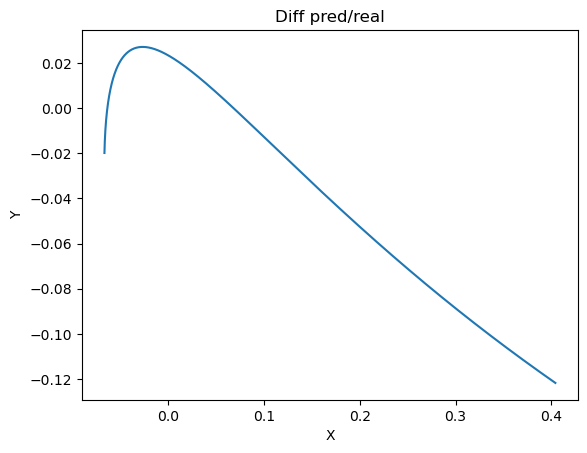

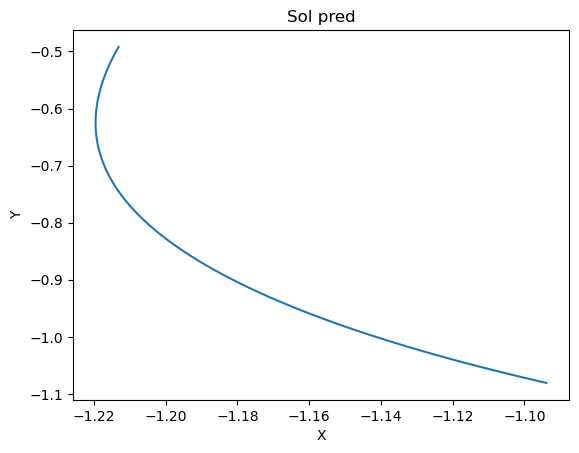

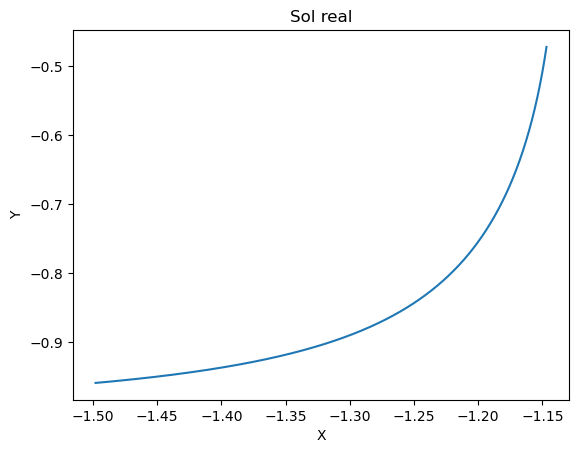

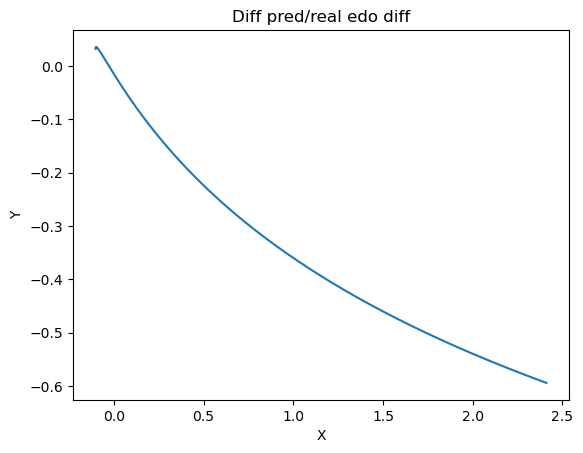

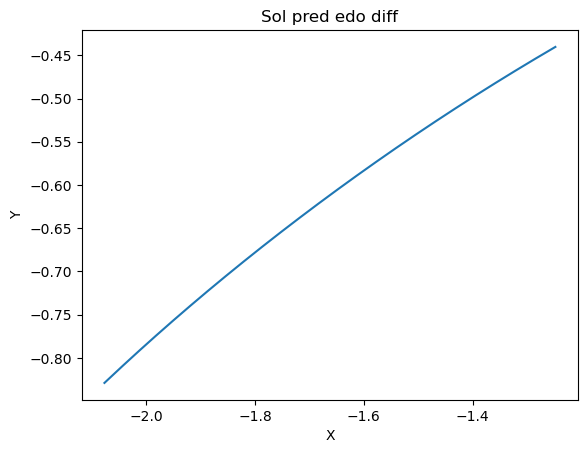

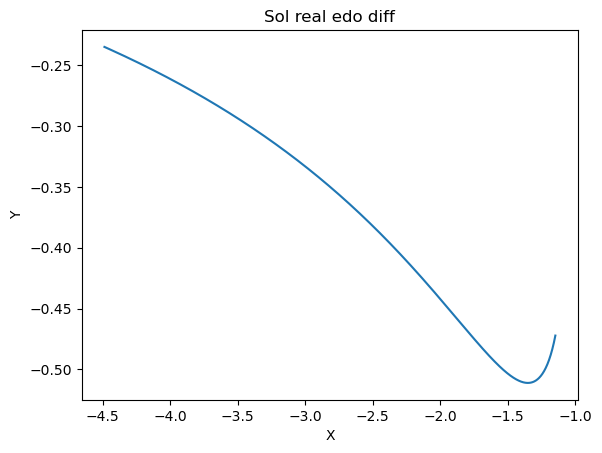

In [55]:
list_t = np.linspace(edo.t0, edo.t0+1, n)
test_Onet(edo, Onet, list_t, edo.y0, edo.y0)
print("")

## Parareal 

t0:  2.7761038024089837 y0:  [0.1, 0.2]
Method 1 with: t0:  2.7761038024089837 y0:  [0.1, 0.2]
List t interface [ 0  1  2  3  4  5  6  7  8  9 10]


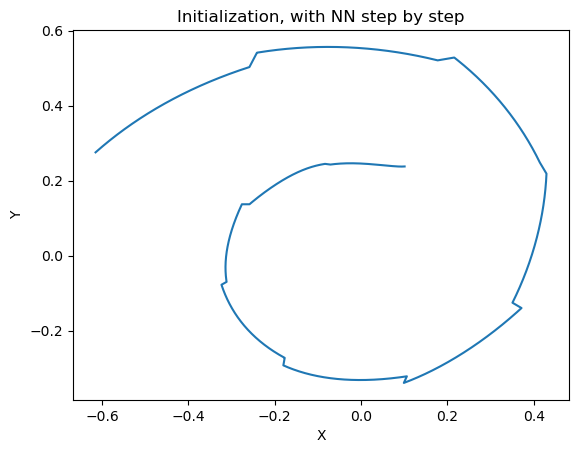

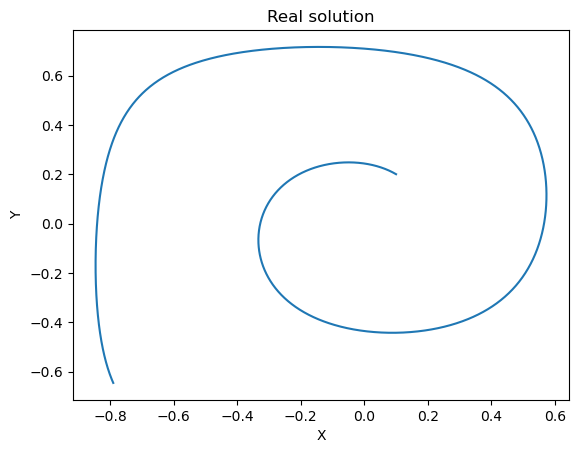

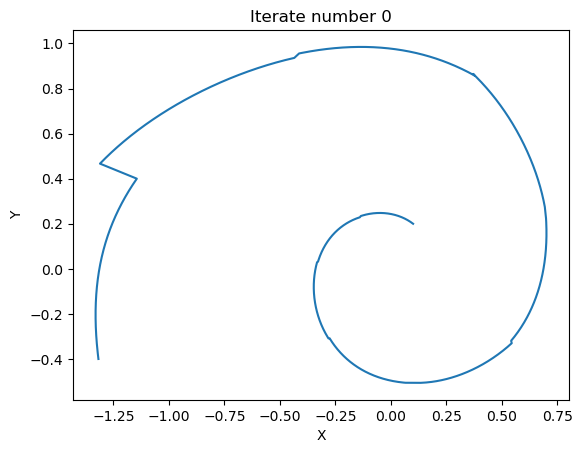

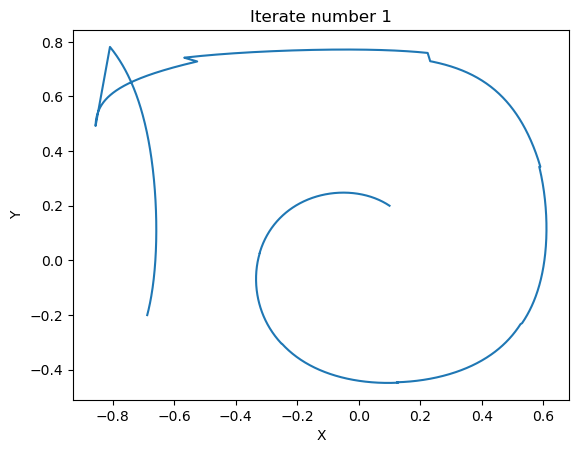

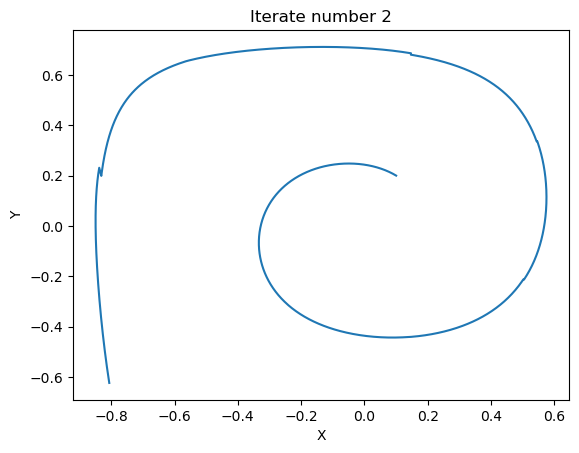

In [56]:
import copy
edo.y0 = [0.1,0.2]
print("t0: ",edo.t0,"y0: ", edo.y0)
NN = lambda t, y0,h : fun_N(Onet, t, t[0], y0, h)
def G_fine(t,y):
    edo1 = copy.deepcopy(edo)
    edo1.y0 = y
    return Odeint_method(edo1, t)

print("Method 1 with:", "t0: ",edo.t0,"y0: ", edo.y0)
t0, t1 , delta_t = 0, 10, 1
list_t_interface = np.arange(t0,t1 + delta_t, delta_t)
print("List t interface" ,list_t_interface)
parareal_NN(edo.y0,G_fine, NN, list_t_interface , m, 3,1)

#print("Method 2 with:",edo.t0,"y0: ", edo.y0 )
#parareal_NN(edo.y0,G_fine, NN, [0,1,2,3,4,5,6,7,8,9], m, 3,2)
print("")